# 1. Import `Libraries`

In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub as kaggle
import os
from sklearn.preprocessing import MinMaxScaler
# uncomment below code if u need plt.show() in your code editor or any environment
# %matplotlib inline

In [239]:
# CONSTANTS
TRAIN_FILE = 'train.csv'
TEST_FILE = 'test.csv'

# 2. Reading Data from CSV Files
The dataset is divided into two parts: train and test.
In this practice, we will focus solely on the `train.csv` file.

see dataset: [Kaggle -> Mobile-Price-Classification][1]

[1]: https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification "dataset link in kaggle"

In [240]:
df = pd.read_csv(TRAIN_FILE)
# df_test = pd.read_csv(TEST_FILE)

# 3. Exploratory Data Analysis (EDA) with `Pandas`
In this section, we will perform a brief exploratory data analysis (EDA) on the dataset using the Pandas library.

In [241]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [242]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [243]:
print(f'Columns (features): {len(df.columns)}')
print(f'Rows: {df.shape[0]}')

Columns (features): 21
Rows: 2000


In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [245]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [246]:
# check if dataset has null value
print(df.isnull().sum())

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


In [247]:
# check if dataset has nan value (like string & etc.)
non_numeric_columns = df.select_dtypes(exclude='number').columns
print(f'non numeric columns count: {len(non_numeric_columns)}')

non numeric columns count: 0


# 4. Analyzing Data: Distribution, Correlation, and Feature Relationships with Price
In this section, we will analyze the dataset to understand:
1. The distribution of numerical features.
2. The correlation between features.
3. The relationship between each feature and the target variable `mobile price`.

We will use visualizations and statistical methods to gain insights into the data.

## 1.4. check distribution of features

array([[<Axes: title={'center': 'battery_power'}>,
        <Axes: title={'center': 'blue'}>,
        <Axes: title={'center': 'clock_speed'}>,
        <Axes: title={'center': 'dual_sim'}>,
        <Axes: title={'center': 'fc'}>],
       [<Axes: title={'center': 'four_g'}>,
        <Axes: title={'center': 'int_memory'}>,
        <Axes: title={'center': 'm_dep'}>,
        <Axes: title={'center': 'mobile_wt'}>,
        <Axes: title={'center': 'n_cores'}>],
       [<Axes: title={'center': 'pc'}>,
        <Axes: title={'center': 'px_height'}>,
        <Axes: title={'center': 'px_width'}>,
        <Axes: title={'center': 'ram'}>,
        <Axes: title={'center': 'sc_h'}>],
       [<Axes: title={'center': 'sc_w'}>,
        <Axes: title={'center': 'talk_time'}>,
        <Axes: title={'center': 'three_g'}>,
        <Axes: title={'center': 'touch_screen'}>,
        <Axes: title={'center': 'wifi'}>],
       [<Axes: title={'center': 'price_range'}>, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >]], 

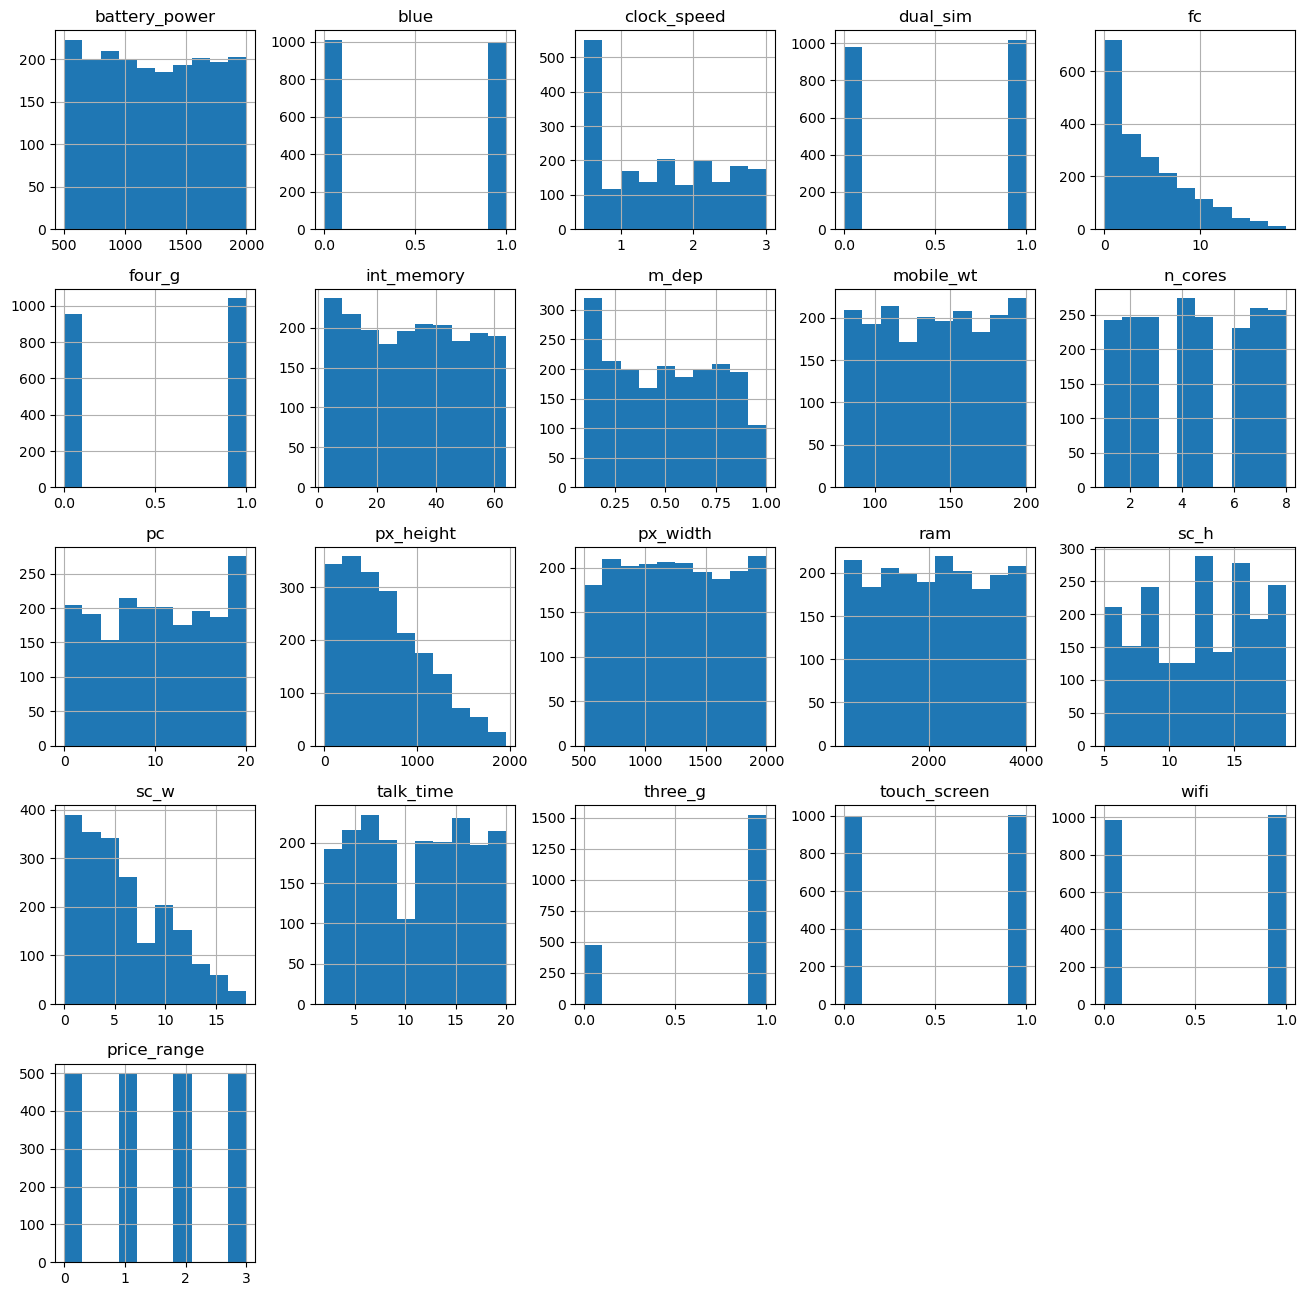

In [248]:
df.hist(figsize=(16,16))

In [249]:
# As you can see, the front camera megapixels (fc) have some outliers.
df['fc'].describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [250]:
# Also pixel height have some outliers.
df['px_height'].describe()

count    2000.000000
mean      645.108000
std       443.780811
min         0.000000
25%       282.750000
50%       564.000000
75%       947.250000
max      1960.000000
Name: px_height, dtype: float64

In [251]:
# Screen Width of mobile in cm
df['sc_w'].describe()

count    2000.000000
mean        5.767000
std         4.356398
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

<Axes: ylabel='count'>

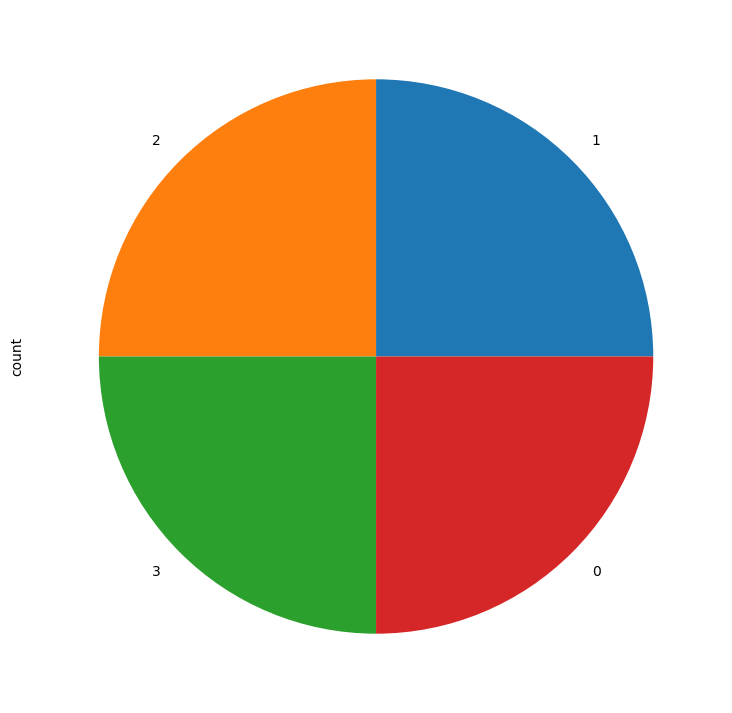

In [252]:
# Data is well distributed
df['price_range'].value_counts().plot(kind='pie', figsize=(14,9))

## 2.4. The correlation between features

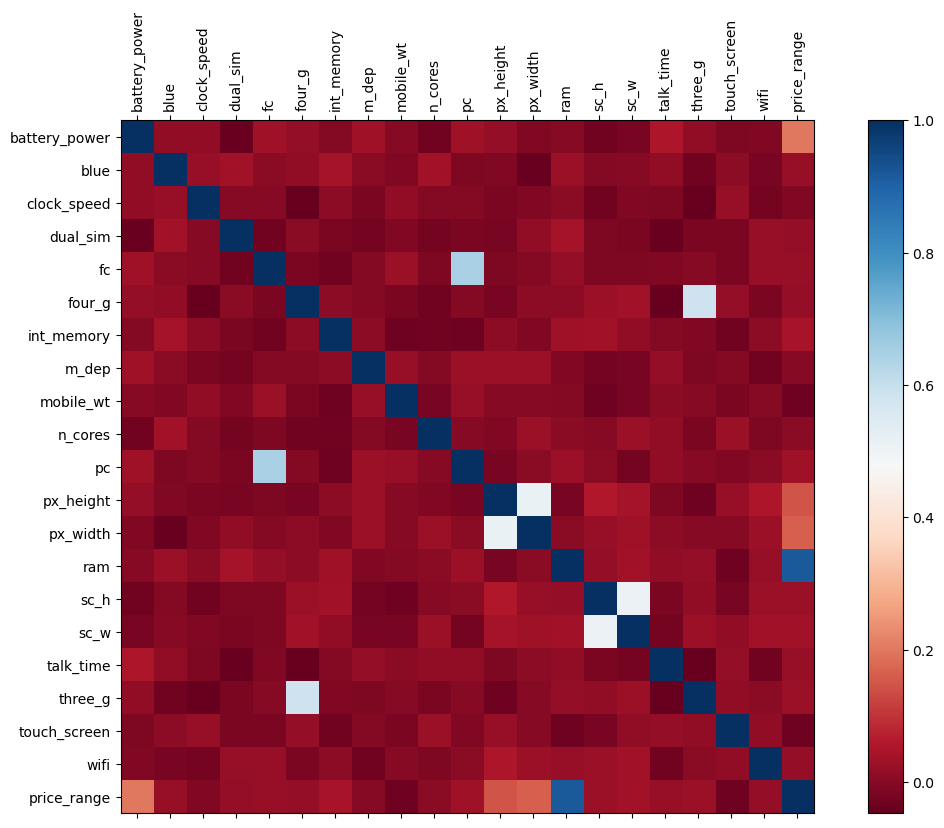

In [253]:
corr = df.corr()

fig, ax = plt.subplots(figsize = (14,9))
cax = ax.matshow(corr, cmap = 'RdBu')
fig.colorbar(cax)

ax.set_xticks(range(len(corr)), corr.columns, rotation = 'vertical')
ax.set_yticks(range(len(corr)), corr.columns)

In [254]:
high_corr = corr.where((corr > 0.6) * (corr < 1))
high_corr

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
blue,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clock_speed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dual_sim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
four_g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
int_memory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
m_dep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mobile_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
n_cores,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
# Convert the correlation matrix into a Series with MultiIndex 
# by stacking column labels into row indices. 
# This flattens the matrix and removes NaN values by default.
stacked_corr = high_corr.stack()
stacked_corr.index.set_names(['Row','Column'], inplace=True)
stacked_corr.name = 'Correlation'
print(stacked_corr)

Row          Column     
fc           pc             0.644595
pc           fc             0.644595
ram          price_range    0.917046
price_range  ram            0.917046
Name: Correlation, dtype: float64


In [256]:
# convert Series to DataFrame
df_corr = stacked_corr.reset_index()
df_corr

,Row,Column,Correlation
0,fc,pc,0.644595
1,pc,fc,0.644595
2,ram,price_range,0.917046
3,price_range,ram,0.917046


## 3.4. The relationship between each feature and the target variable `mobile price`.

<Axes: xlabel='ram', ylabel='price_range'>

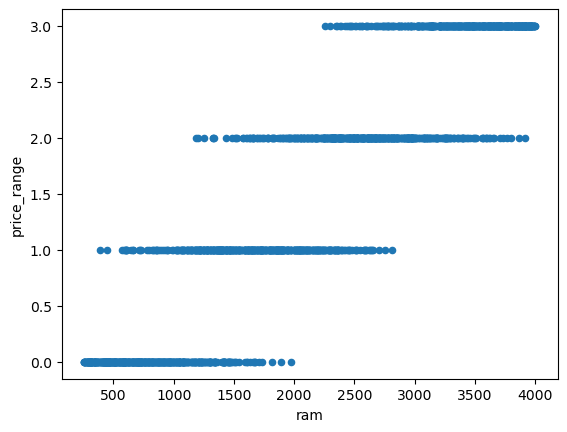

In [257]:
df.plot(kind= 'scatter', x = 'ram', y = 'price_range')

<Axes: title={'center': 'price_range'}, xlabel='pc'>

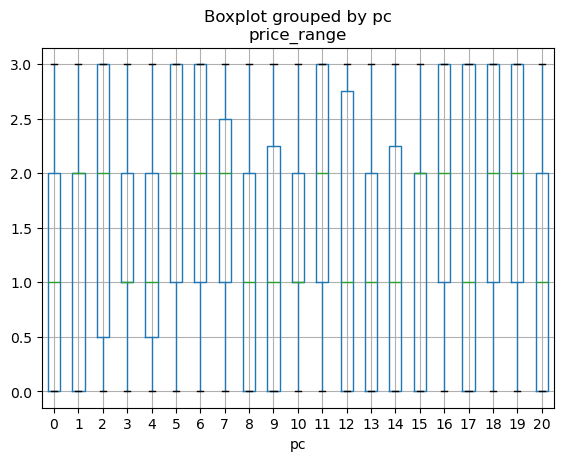

In [258]:
df.boxplot(column = 'price_range', by ='pc')

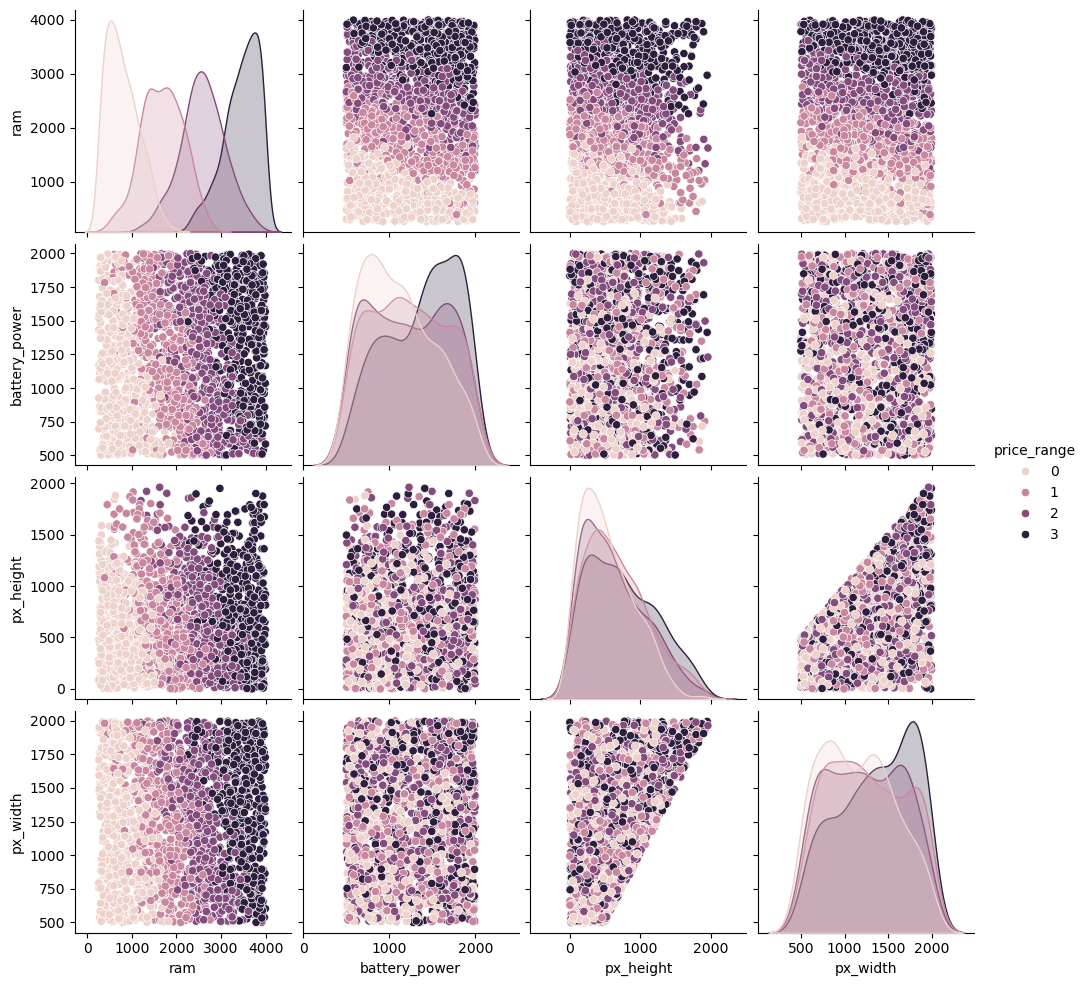

In [259]:
sns.pairplot(df, vars= ['ram', 'battery_power','px_height','px_width'], hue='price_range')

In [260]:
df.groupby('price_range').mean()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
price_range,,,,,,,,,,,,,,,,,,,,
0,1116.902,0.486,1.5502,0.500,4.084,0.518,31.174,0.4902,140.552,4.600,9.574,536.408,1150.270,785.314,12.324,5.682,10.612,0.746,0.524,0.496
1,1228.868,0.490,1.4886,0.510,4.340,0.524,32.116,0.5240,140.510,4.298,9.924,666.892,1251.908,1679.490,12.212,5.544,11.362,0.756,0.522,0.504
2,1228.320,0.486,1.5298,0.498,4.498,0.494,30.920,0.4908,143.614,4.682,10.018,632.284,1234.046,2582.816,12.010,5.714,10.972,0.774,0.470,0.504
3,1379.984,0.518,1.5204,0.530,4.316,0.550,33.976,0.5020,136.320,4.502,10.150,744.848,1369.838,3449.232,12.680,6.128,11.098,0.770,0.496,0.524


<Axes: ylabel='price_range'>

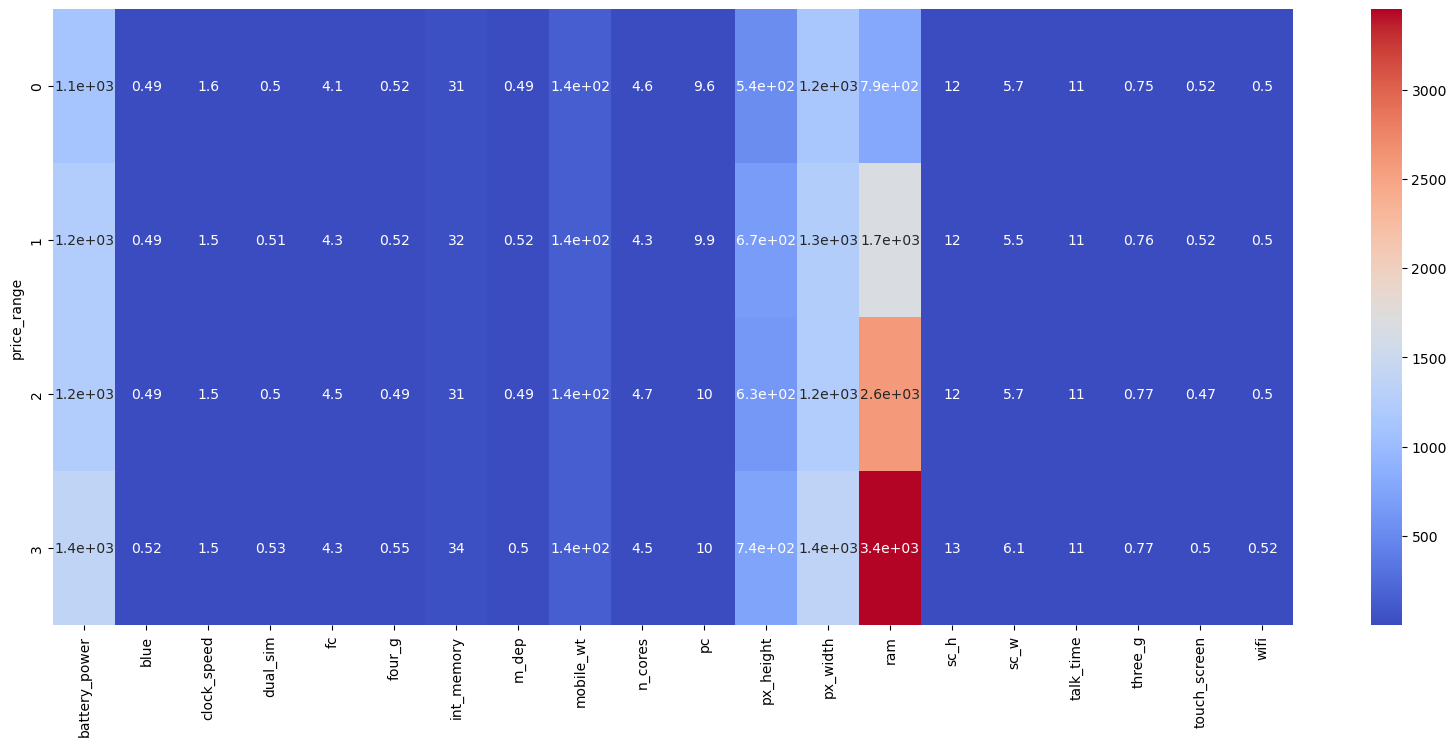

In [261]:
plt.figure(figsize=(20,8))
sns.heatmap(df.groupby('price_range').mean(), annot=True, cmap='coolwarm')

# 5. Data Preprocessing: Outlier Removal and Feature Selection
In this section, we will perform the following preprocessing steps:
1. Remove outliers using the Interquartile Range (IQR) method.
2. Perform feature selection using Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA).

These steps will help us clean the data and reduce its dimensionality for better model performance.

## 1.5. Remove outliers using the Interquartile Range (IQR) method.

### `front camera`

In [262]:
q1 = df['fc'].quantile(0.25)
q3 = df['fc'].quantile(0.75)

iqr = q3 - q1

# lower bonad of front camera can't be negative
lower_bound = max(0,q1 - (1.5 * iqr))
upper_bound = q3 + (1.5 * iqr)

print('Q1:',q1)
print('Q3:',q3)
print('IQR:',iqr)
print('lower bound:',lower_bound)
print('upper bound:',upper_bound)


df_filtered = df[(df['fc'] >= lower_bound) & (df['fc'] <= upper_bound)]

Q1: 1.0
Q3: 7.0
IQR: 6.0
lower bound: 0
upper bound: 16.0


In [263]:
df_filtered['fc'].describe()

count    1982.000000
mean        4.187689
std         4.167383
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        16.000000
Name: fc, dtype: float64

In [264]:
df['fc'].describe()

count    2000.000000
mean        4.309500
std         4.341444
min         0.000000
25%         1.000000
50%         3.000000
75%         7.000000
max        19.000000
Name: fc, dtype: float64

In [265]:
print(df_filtered.shape[0] * 100 /df.shape[0],'percent of the data were preserved')

99.1 percent of the data were preserved


### `pixel height`

In [266]:
q1 = df['px_height'].quantile(0.25)
q3 = df['px_height'].quantile(0.75)


iqr = q3 - q1
lower_bound = max(0, q1 - (1.5 * iqr))
upper_bound = q3 + (1.5 * iqr)

print('Q1:',q1)
print('Q3:',q3)
print('IQR:',iqr)
print('lower bound:',lower_bound)
print('upper bound:',upper_bound)

df_filtered = df_filtered[(df_filtered['px_height'] >= lower_bound) & (df_filtered['px_height'] <= upper_bound)]
print()
print(df_filtered.shape[0] * 100 /df.shape[0],'percent of the data were preserved')

df_filtered['px_height'].describe()

Q1: 282.75
Q3: 947.25
IQR: 664.5
lower bound: 0
upper bound: 1944.0

99.0 percent of the data were preserved


count    1980.000000
mean      641.183838
std       439.957961
min         0.000000
25%       281.750000
50%       561.500000
75%       942.000000
max      1920.000000
Name: px_height, dtype: float64

### `Screen Width` 

In [267]:
q1 = df['sc_w'].quantile(0.25)
q3 = df['sc_w'].quantile(0.75)

iqr = q3 - q1
lower_bound = max(0, q1 - (1.5 * iqr))
upper_bound = q3 + (1.5 * iqr)

print('Q1:',q1)
print('Q3:',q3)
print('IQR:',iqr)
print('lower bound:',lower_bound)
print('upper bound:',upper_bound)

df_filtered = df_filtered[(df_filtered['sc_w'] >= lower_bound) & (df_filtered['sc_w'] <= upper_bound)]
print()
print(df_filtered.shape[0] * 100 /df.shape[0],'percent of the data were preserved')
df_filtered['sc_w'].describe()

Q1: 2.0
Q3: 9.0
IQR: 7.0
lower bound: 0
upper bound: 19.5

99.0 percent of the data were preserved


count    1980.000000
mean        5.773737
std         4.358066
min         0.000000
25%         2.000000
50%         5.000000
75%         9.000000
max        18.000000
Name: sc_w, dtype: float64

### IQR for all `Features`

In [268]:
# normalize data using MinMaxScaler
scaler = MinMaxScaler()

df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [269]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - (IQR * 1.5)
upper_bound = Q3 + (IQR * 1.5)

# if negative, set 0
lower_bound = lower_bound.clip(lower=0)

df_cleaned = df_scaled[((df_scaled >= lower_bound) & (df_scaled <= upper_bound)).all(axis=1)]
print()
print(df_cleaned.shape[0] * 100 /df.shape[0],'percent of the data were preserved')

df_cleaned.describe()


75.3 percent of the data were preserved


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,...,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.000000,1506.0,1506.000000,1506.000000,1506.000000
mean,0.493008,0.486056,0.400319,0.505312,0.220137,0.684595,0.483175,0.444444,0.501688,0.501138,...,0.322802,0.500209,0.502407,0.524616,0.324923,0.492659,1.0,0.505976,0.505312,0.504648
std,0.293355,0.499972,0.325540,0.500138,0.221886,0.464831,0.293845,0.319832,0.292863,0.325231,...,0.222082,0.286364,0.289833,0.300970,0.245435,0.301884,0.0,0.500130,0.500138,0.371980
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000
25%,0.234469,0.000000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.140306,0.251836,0.258752,0.285714,0.111111,0.222222,1.0,0.000000,0.000000,0.333333
50%,0.482966,0.000000,0.400000,1.000000,0.157895,1.000000,0.467742,0.444444,0.508333,0.428571,...,0.284439,0.498665,0.509220,0.500000,0.277778,0.500000,1.0,1.000000,1.000000,0.666667
75%,0.746493,1.000000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.476148,0.749499,0.755144,0.785714,0.500000,0.722222,1.0,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.842105,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.979592,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000


In [270]:
df_cleaned.shape

(1506, 21)

## 2.5. Perform feature selection using Principal Component Analysis (PCA) or Linear Discriminant Analysis (LDA).